# MNIST Classifier - Hello World of ML!
<hr/>

## Introduction

This notebook is suffixed with __LEVEL_HERO_DEMO__ because it is deployable high performant ML classifier for the [MNIST](https://paperswithcode.com/dataset/mnist) dataset. This set is presented by your instructor during the lecture. Please confer to the lecture notes for further details.

This notebook is a __demonstration notebook__ to: 
- test your DEV environment,
- show you how developing a ML model can be very simple,
- show you how a simple MLP can achieve quite-human performance in the simple task of recognizing hand-written digits.


## Imports

In [34]:
import os
import idx2numpy
import numpy as np ; np.random.seed(42)
import matplotlib.pyplot as plt
import tensorflow as tf ; tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical

## Hardware

In [35]:
CPUS = tf.config.list_physical_devices('CPU')
GPUS = tf.config.list_physical_devices('GPU')

print("[INFO] Num CPUs:", len(CPUS), ", list = ", CPUS)
print("[INFO] Num GPUs:", len(GPUS), ", list = ", GPUS)

[INFO] Num CPUs: 1 , list =  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[INFO] Num GPUs: 2 , list =  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


## Notebook parameters

In [36]:
# NumPy

np.set_printoptions(linewidth=200) # to enlarge the print() line
np.random.seed(42) # the random seed init
np.set_printoptions(precision=3) # for numpy floats: number of decimals

# TF: disable TF debug logging messages 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Globals & hyperparameters

In [37]:
# =============
# DATA_TOPDIR
# =============

# Contain the (un)compressed idx files of MNIST

# on assieoussou (Laptop - CPU)
# DATA_TOPDIR = "/home/ml/datasets/mnist"

# on cocoti (Tour - GPU)
DATA_TOPDIR = "/data/ml/datasets/mnist"

# =======
# MNIST 
# =======

# dataset files
TRAIN_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-images-idx3-ubyte")
TRAIN_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "train-labels-idx1-ubyte")
TEST_IMAGES_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-images-idx3-ubyte")
TEST_LABELS_DATASET_FILE = os.path.join(DATA_TOPDIR, "t10k-labels-idx1-ubyte")

# The MNIST images format
num_pixels = 28 * 28

# the total number of digits
num_classes = 10

# ==========================
# Training hyperparameters
# ==========================

# epochs = 10 # <= CPU
epochs = 20 # <= GPU

# batch_size = 8 # <= on CPU
batch_size = 64 # <= on GPU

# =======
# Demo 
# =======

# Demo dir: where demonstration images are placed
DEMO_DIR = os.path.join(DATA_TOPDIR, "demo")
os.makedirs(DEMO_DIR, exist_ok=True)

# for demo images 
nb_demo = 10
demo_prefix = "demo_img_"


## Data Preparation (Part I)

>__Note:__ In this notebook, all the steps regarding the understanding of the data are skipped. Indeed, in practice Data Scientist spend __80%__ of their time here!



In [38]:
# 1. Read each dataset into a conventional numpy 2D array
train_x_ndarray = idx2numpy.convert_from_file(TRAIN_IMAGES_DATASET_FILE)
train_y_ndarray = idx2numpy.convert_from_file(TRAIN_LABELS_DATASET_FILE)

test_x_ndarray = idx2numpy.convert_from_file(TEST_IMAGES_DATASET_FILE)
test_y_ndarray = idx2numpy.convert_from_file(TEST_LABELS_DATASET_FILE)

(60000, 28, 28) (60000,)
train_x_ndarray[0] = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

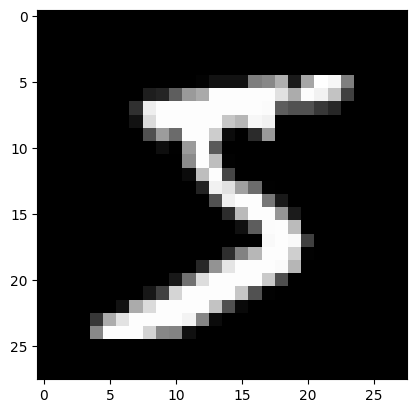

In [39]:
# quick check 
print(train_x_ndarray.shape, train_y_ndarray.shape) # => (60000, 28, 28) (60000,)
print(f"train_x_ndarray[0] = \n{train_x_ndarray[0]}, \ntrain_y_ndarray[0] = {train_y_ndarray[0]}" )
print(train_x_ndarray[0].shape, train_y_ndarray[0].shape) # => (28, 28) ()
plt.imshow(train_x_ndarray[0], cmap='gray')

## Model construction & configuration

>__Note:__ In this notebook, all the steps regarding the (best) model selection and evaluation are skipped. We propose directly the best model architecture: a __Convolutional Neural Network (CNN)__ 

In [40]:
def build_model():
    model = Sequential()
    # =================================
    # Feature extractor
    # =================================
    model.add(Input(shape=(28,28,1))),
    model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2))),
    model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2))),
    # =================================
    # Neck
    # =================================
    model.add(Flatten()),
    model.add(Dropout(0.5))
    # =================================
    # Head 
    # =================================
    # model.add(Dense(units=64, activation="relu")) # <= on CPU
    # model.add(Dense(units=128, activation="relu")) # <= on GPU
    model.add(Dense(units=num_classes, activation="softmax"))
    # =================================
    # Compile model
    # =================================
    model.compile(loss="categorical_crossentropy", 
                  # optimizer="adam",
                  optimizer=tf.keras.optimizers.Adam(1e-3),
                  metrics=["accuracy"])
    return model

# Construct the model and show it
model = build_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Data Preparation (Part II)

>__Important:__  Since we know our target ML model now, we need to finalize the preparation of our data according this model (see the Input layer defined by `Input(shape=(28,28,1))`). We need to make sure the training data match this shape!

In [41]:
X_train = train_x_ndarray.astype('float32')
X_test = test_x_ndarray.astype('float32')

# make sure you are not introducing nan
X_train = np.nan_to_num(X_train, nan=0)
X_test = np.nan_to_num(X_test, nan=0)

# normalization: VERY IMPORTANT!!!!
X_train = X_train / 255
X_test = X_test / 255

# one hot encoding of labels
y_train = to_categorical(train_y_ndarray)
y_test = to_categorical(test_y_ndarray)
num_classes = y_train.shape[1]

# before reshaping
print("[INFO] before reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)
print("[INFO] before reshaping >>> ",X_train[0], y_train[0])

[INFO] before reshaping >>>  (60000, 28, 28) (28, 28) (60000, 10) (10000, 28, 28) (60000, 10)
[INFO] before reshaping >>>  [[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.

In [42]:
# Explicit reshaping of training and testing data to (28, 28, 1)

# WARNING: 
# Here, we could have rely on implicit broadcasting of TF Keras to not reshape and let ate of shape (28, 28) to be automatically 
# reshaped into (28, 28, 1) ; bit it is a bad practice!

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("[INFO] After reshaping >>> ", X_train.shape, X_train[0].shape, y_train.shape, X_test.shape, y_train.shape)

[INFO] After reshaping >>>  (60000, 28, 28, 1) (28, 28, 1) (60000, 10) (10000, 28, 28, 1) (60000, 10)


## Model Training & Evaluation

In [47]:
# Remind the hyperparameters values

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Hyperparameters")
print("[INFO] ======================= ")
print("[INFO]")
print(f"[INFO] batch_size = {batch_size}")
print(f"[INFO] epochs = {epochs}")

print("[INFO]")
print("[INFO] ======================= ")
print("[INFO] Train & Evaluate")
print("[INFO] ======================= ")
print("[INFO]")

# Fit the model
history = model.fit(
    x=X_train, 
    y=y_train,
    batch_size=batch_size,
    validation_data=(X_test, y_test), 
    epochs=epochs
)

# Note: 
# During the fit, monitor the GPUs activity using: $ watch -n 0.5 nvidia-smi

[INFO]
[INFO] ======================= 
[INFO] Hyperparameters
[INFO] ======================= 
[INFO]
[INFO] batch_size = 64
[INFO] epochs = 50
[INFO]
[INFO] ======================= 
[INFO] Train & Evaluate
[INFO] ======================= 
[INFO]
Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9927 - val_loss: 0.0263
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9924 - val_loss: 0.0273
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9928 - val_loss: 0.0245
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9923 - val_loss: 0.0279
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9928 - val_loss: 0.0243
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9932 - val_

KeyboardInterrupt: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


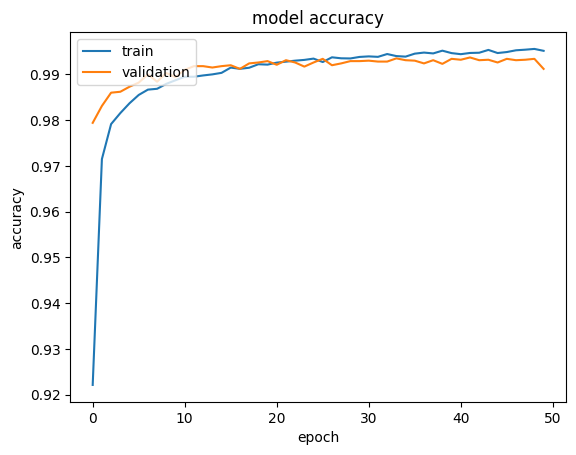

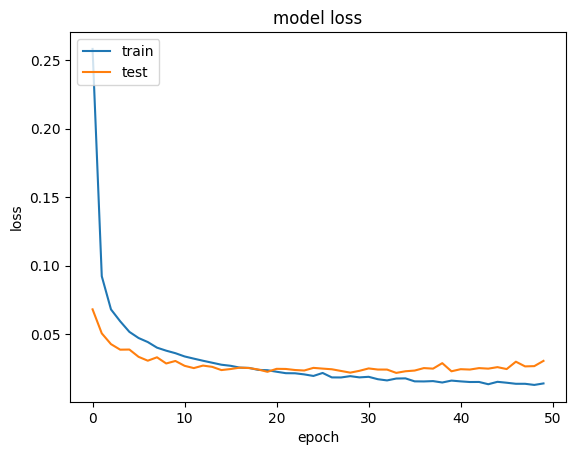

In [44]:
# check entries in the history 
print(history.history.keys()) # => dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# summarize history for accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
# Final evaluation of the model
scores = model.evaluate(
    x=X_test, 
    y=y_test, 
    verbose=0
)

print("\n[INFO] Model Val Accuracy: %.2f%%, Error: %.2f%%" % (scores[1]*100, 100-scores[1]*100))

2025-03-09 19:45:08.282870: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-03-09 19:45:08.307211: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,11,11]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,13,13]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=


[INFO] Model Val Accuracy: 99.12%, Error: 0.88%


## Construct the demonstration set

Here, we isolate in the `demo/` subdirectory, some testing images. We'll use them later on - once our model is trained - to demonstrate how accurate it is. 

In [46]:
def reconstruct_demo_dir(nb, from_set, target_dir):
    # randomly collect the indices
    demo_rnd_indices = np.random.randint(1, high=len(from_set), size=nb)
    for i in demo_rnd_indices:
        plt.imsave(os.path.join(target_dir, demo_prefix + str(i) + ".jpg"), from_set[i], cmap='gray')
    print(f"[INFO] {len(demo_rnd_indices)} images have been created in {target_dir}")        

# check if the demo dir exists and contains at least nb_demo files

if os.path.exists(DEMO_DIR): 
    nb_files = len([name for name in os.listdir(DEMO_DIR) if os.path.isfile(os.path.join(DEMO_DIR, name))])
    if nb_files < nb_demo:
        # So you can safely manually add demo file 
        reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)
    else:
        print(f"[INFO] Nothing to do because {DEMO_DIR} contains already enough images!")
else: 
    reconstruct_demo_dir(nb=nb_demo, from_set=test_x_ndarray, target_dir=DEMO_DIR)

[INFO] 10 images have been created in /data/ml/datasets/mnist/demo
